In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

### to change according to your machine
base_dir = os.path.expanduser("/home/data/lcz")
path_training = os.path.join(base_dir, 'training.h5')
path_validation = os.path.join(base_dir, 'validation.h5')

fid_training = h5py.File(path_training,'r')
fid_validation = h5py.File(path_validation,'r')

## we can have a look at which keys are stored in the file
## you will get the return [u'label', u'sen1', u'sen2']
## sen1 and sen2 means the satellite images
#print fid_training.keys()
print (fid_validation.keys())

### get s1 image channel data
### it is not really loaded into memory. only the indexes have been loaded.
print ("-" * 60)
print ("training part")
s1_training = fid_training['sen1']
print (s1_training.shape)
s2_training = fid_training['sen2']
print (s2_training.shape)
label_training = fid_training['label']
print (label_training.shape)

print ("-" * 60)
print ("validation part")
s1_validation = fid_validation['sen1']
print (s1_validation.shape)
s2_validation = fid_validation['sen2']
print (s2_validation.shape)
label_validation = fid_validation['label']
print (label_validation.shape)

KeysView(<HDF5 file "validation.h5" (mode r)>)
------------------------------------------------------------
training part
(352366, 32, 32, 8)
(352366, 32, 32, 10)
(352366, 17)
------------------------------------------------------------
validation part
(24119, 32, 32, 8)
(24119, 32, 32, 10)
(24119, 17)


In [2]:
## compute the quantity for each col
label_qty = np.sum(label_validation, axis=0)

In [3]:
min(label_qty)

202.0

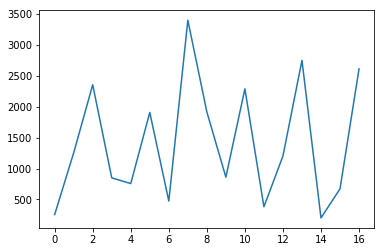

In [4]:
# visualization, plot the first pair of Sentinel-1 and Sentinel-2 patches of training.h5
import matplotlib.pyplot as plt
plt.plot(label_qty)

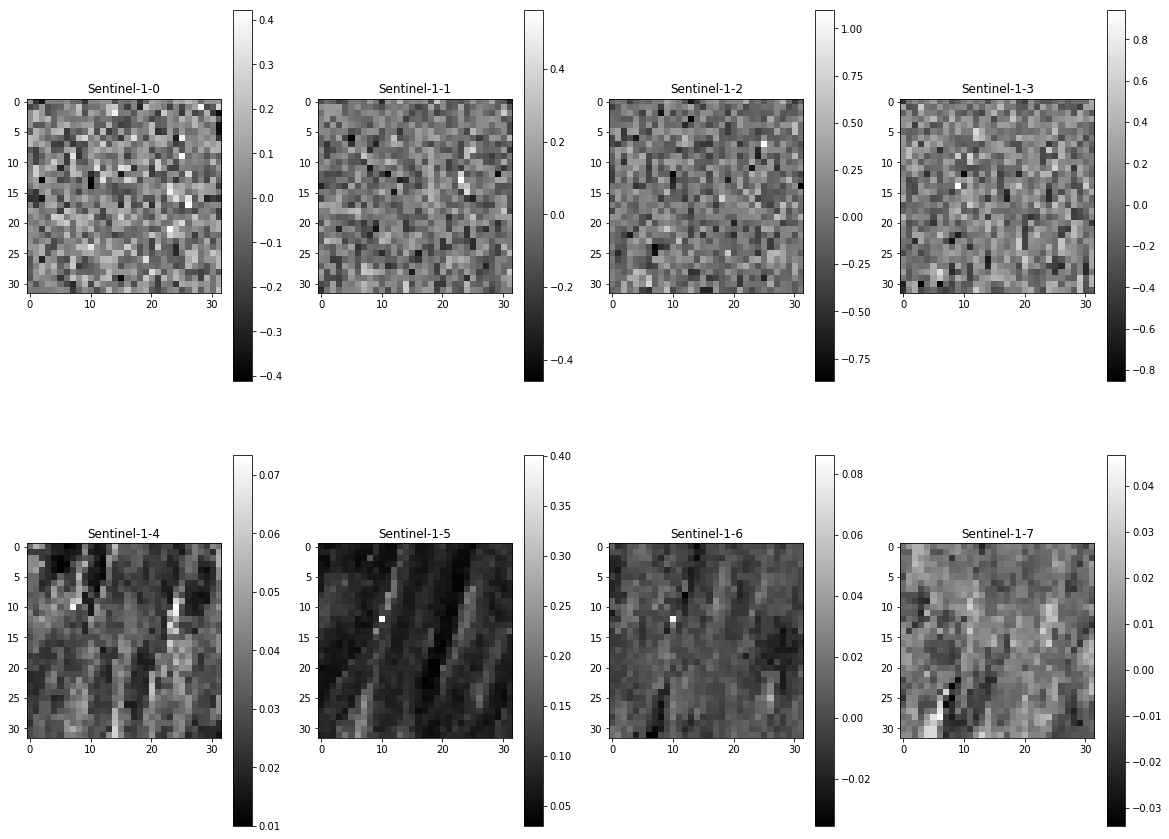

In [5]:
plt.subplots(figsize=(20, 15))

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(s1_training[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1-%d'%(i))
plt.show()

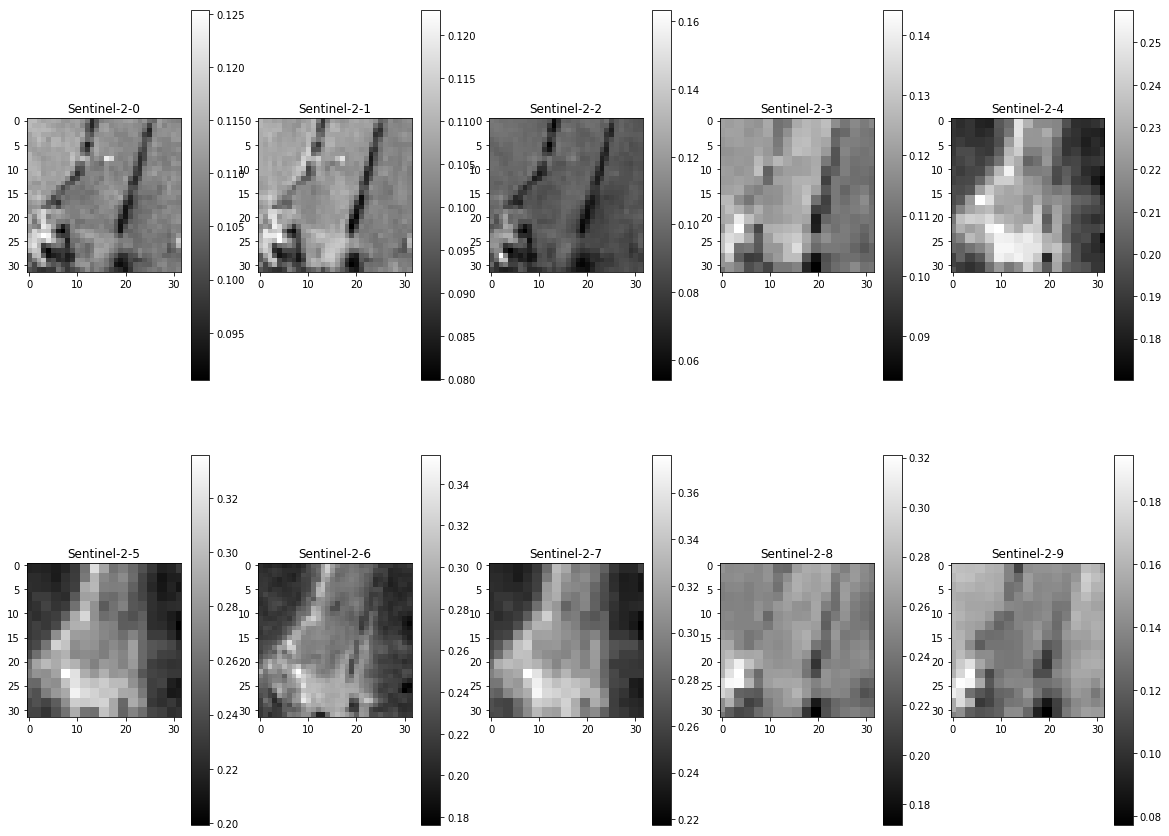

In [6]:
plt.subplots(figsize=(20, 15))

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(s2_training[9,:,:,i],cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

In [7]:
s1=[]
s2=[]
for i in range(17):
    idx=np.where(label_validation[:,i])[0][:202]
    s1.append(s1_validation[list(idx)])
    s2.append(s2_validation[list(idx)])
s1=np.concatenate(s1)
s2=np.concatenate(s2)
print(s1.shape,s2.shape)

(3434, 32, 32, 8) (3434, 32, 32, 10)


(3434, 32, 32, 8)


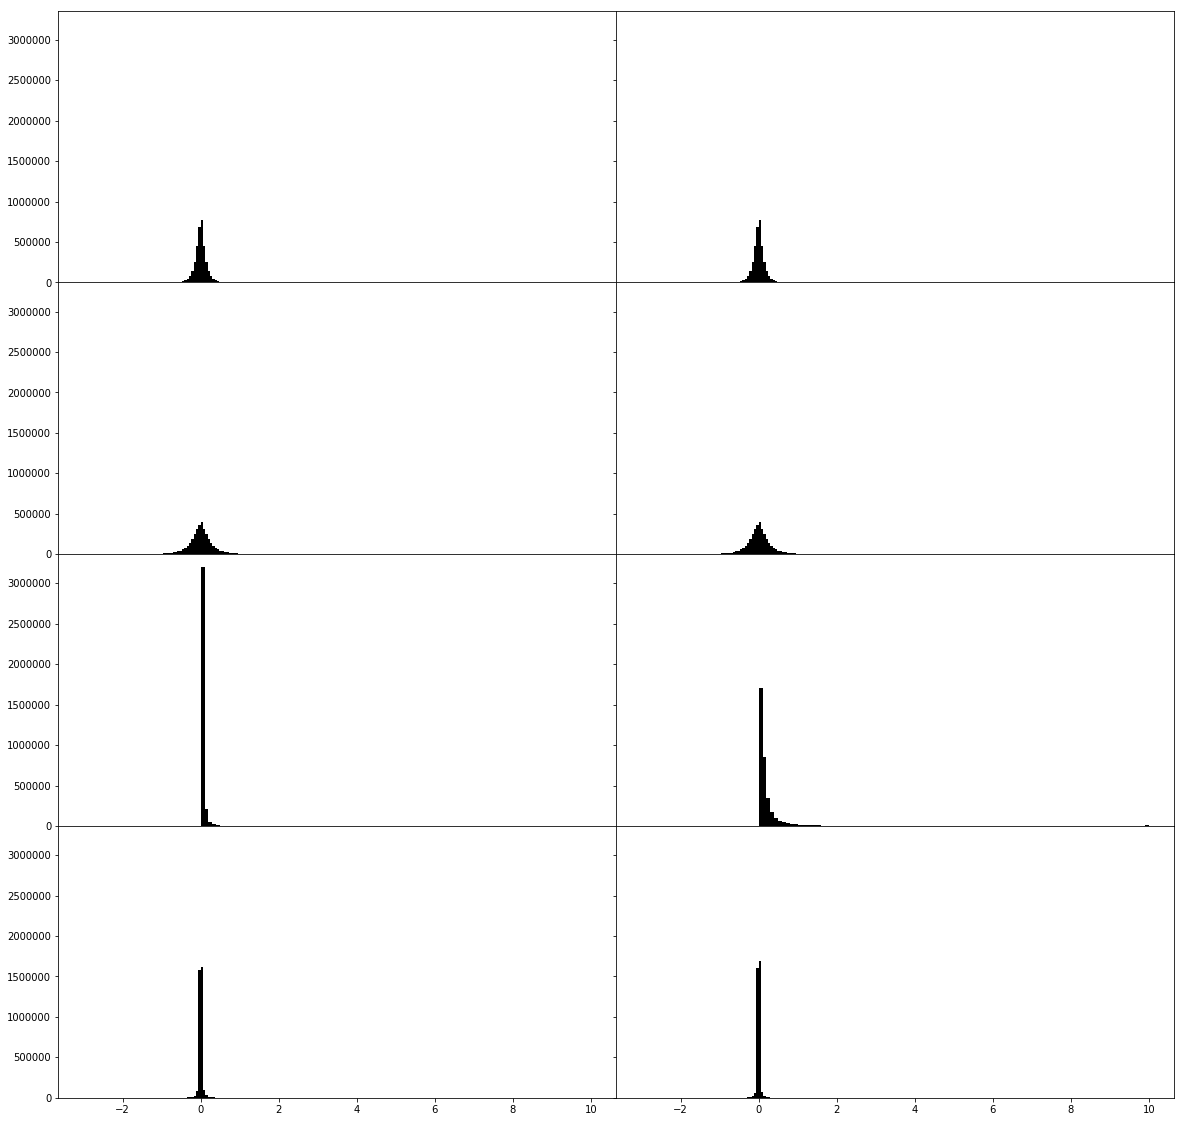

In [72]:
s1_=np.where(s1>10,10,s1)
s1_=np.where(s1_<-10,-10,s1_)

s1_nor=[]
fig, axes = plt.subplots(4,2,sharex=True, sharey=True,figsize=(20,20))
for i in range(4):
    for j in range(2):
        s1_n=s1_[:,:,:,i*2+j]
        if ((i*2+j)<4 or (i*2+j)>5):
            s1_n=np.where(s1_n<-2,-2+(s1_n+2)/8,s1_n)
            s1_n=np.where(s1_n>2,2+(s1_n-2)/8,s1_n)
        axes[i,j].hist(s1_n.reshape([-1]), bins=100, color='k')
        s1_nor.append(s1_n)
s1_nor=np.stack(s1_nor,-1)
print(s1_nor.shape)
plt.subplots_adjust(wspace=0,hspace=0)

(3434, 32, 32, 10)


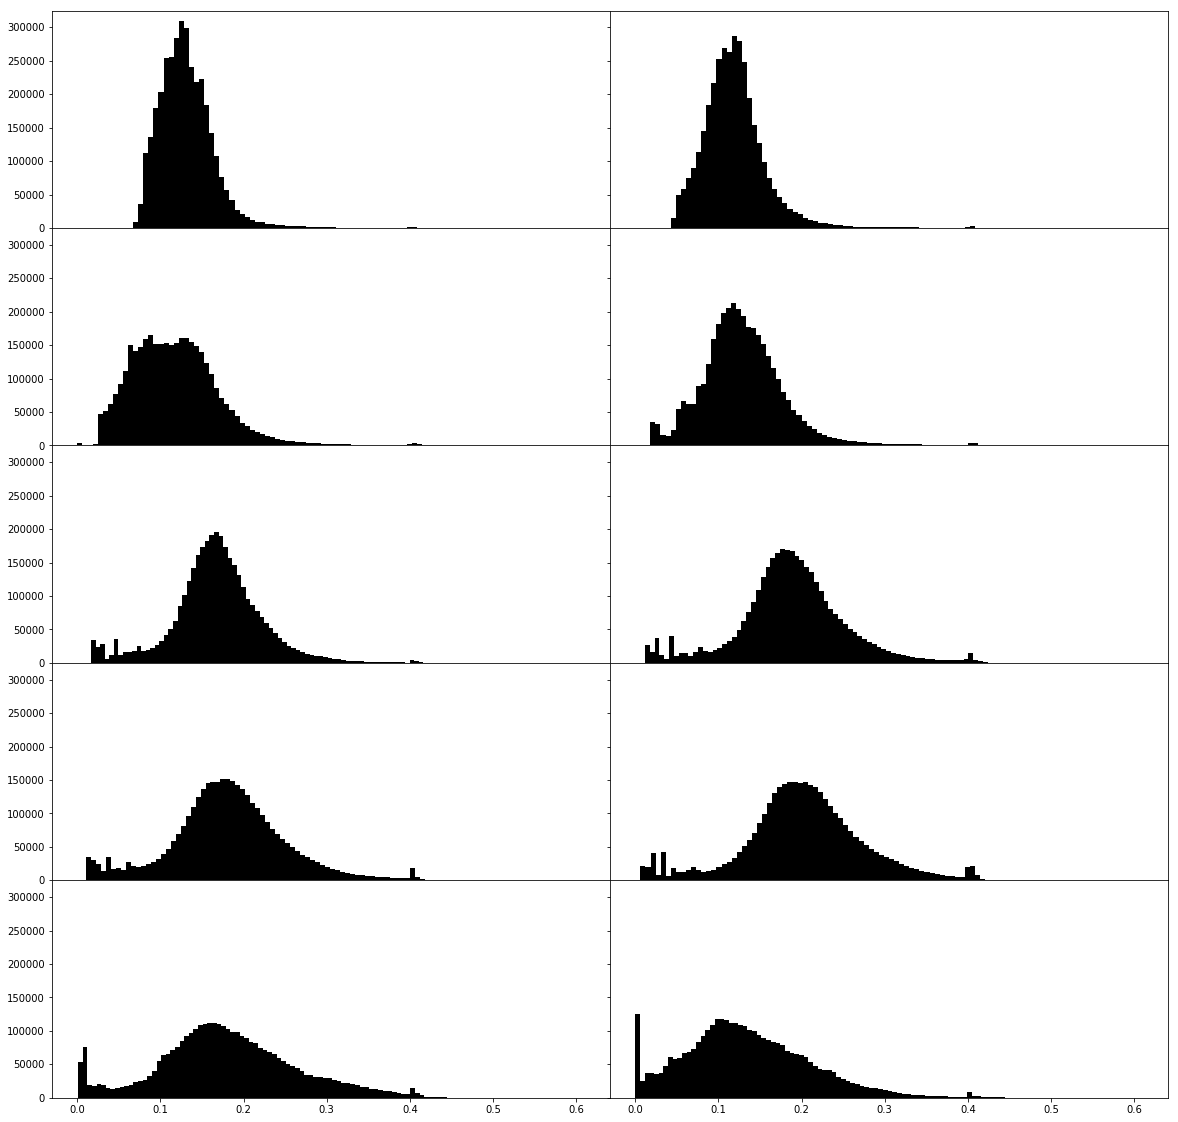

In [85]:
s2_=np.where(s2>2.5,2.5,s2)
s2_nor=[]
fig, axes = plt.subplots(5,2,sharex=True, sharey=True,figsize=(20,20))
for i in range(5):
    for j in range(2):
        s2_n=s2_[:,:,:,i*2+j]
        s2_n=np.where(s2_n>0.4,0.4+(s2_n-0.4)/10,s2_n)
        axes[i,j].hist(s2_n.reshape([-1]), bins=100, color='k')
        s2_nor.append(s2_n)
s2_nor=np.stack(s2_nor,-1)
print(s2_nor.shape)
plt.subplots_adjust(wspace=0,hspace=0)

In [86]:
s1_=s1.reshape([-1,8])
s2_=s2_nor.reshape([-1,10])
s1_std=[np.max(s1_,0),np.min(s1_,0),np.mean(s1_,0),np.std(s1_,0)]
s2_std=[np.max(s2_,0),np.min(s2_,0),np.mean(s2_,0),np.std(s2_,0)]
s1_std,s2_std

([array([  15.36975002,   20.65049553,   56.73969269,   29.31453323,
          400.12658691, 4613.86181641,  335.03112793,  879.69989014]),
  array([-2.80124874e+01, -2.09875145e+01, -6.38304863e+01, -9.65072174e+01,
          1.47688697e-04,  7.33783701e-04, -6.45209839e+02, -2.49361710e+02]),
  array([-1.31680107e-04, -4.88908141e-06,  5.12196703e-04, -2.16476281e-04,
          5.53130441e-02,  3.18162627e-01,  1.16714403e-03,  1.84725682e-03]),
  array([0.19676043, 0.19696308, 0.50251822, 0.50178117, 0.76079854,
         4.53005392, 0.95433871, 0.77154316])],
 [array([0.61   , 0.61   , 0.61   , 0.60563, 0.54773, 0.58039, 0.61   ,
         0.61   , 0.55599, 0.562  ]),
  array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0103, 0.0001,
         0.001 , 0.0001]),
  array([0.1315846 , 0.11975383, 0.1179994 , 0.12906316, 0.16734989,
         0.18818464, 0.1810248 , 0.20179141, 0.18081133, 0.13477051]),
  array([0.0343778 , 0.03924315, 0.05384612, 0.04959969, 0.05566653,
         0.0

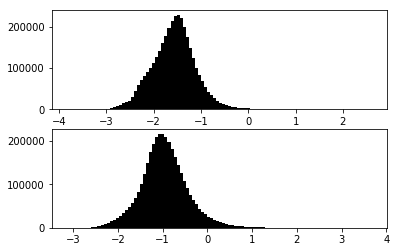

In [87]:
s1_46=np.log10(s1[:,:,:,4:6])
for i in range(2):
  plt.subplot(2,1,i+1)
  plt.hist(s1_46[:,:,:,i].reshape([-1]), bins=100, color='k')
plt.show()

In [88]:
s1_46std=s1_46.reshape([-1,2])
s1_46std=[np.max(s1_46std,0),np.min(s1_46std,0),np.mean(s1_46std,0),np.std(s1_46std,0)]
print(s1_46std)

[array([2.60219741, 3.66406458]), array([-3.83065274, -3.13443194]), array([-1.57260346, -0.95843714]), array([0.4531282 , 0.52381222])]


In [89]:
s1_mean=np.concatenate([s1_std[2][:4],s1_46std[2],s1_std[2][6:]])
s2_mean=s2_std[2]
s1_stdd=np.concatenate([s1_std[3][:4],s1_46std[3],s1_std[3][6:]])
s2_stdd=s2_std[3]
s1_mean,s1_stdd,s2_mean,s2_stdd

(array([-1.31680107e-04, -4.88908141e-06,  5.12196703e-04, -2.16476281e-04,
        -1.57260346e+00, -9.58437137e-01,  1.16714403e-03,  1.84725682e-03]),
 array([0.19676043, 0.19696308, 0.50251822, 0.50178117, 0.4531282 ,
        0.52381222, 0.95433871, 0.77154316]),
 array([0.1315846 , 0.11975383, 0.1179994 , 0.12906316, 0.16734989,
        0.18818464, 0.1810248 , 0.20179141, 0.18081133, 0.13477051]),
 array([0.0343778 , 0.03924315, 0.05384612, 0.04959969, 0.05566653,
        0.06556533, 0.06945987, 0.07402925, 0.08405288, 0.07621804]))

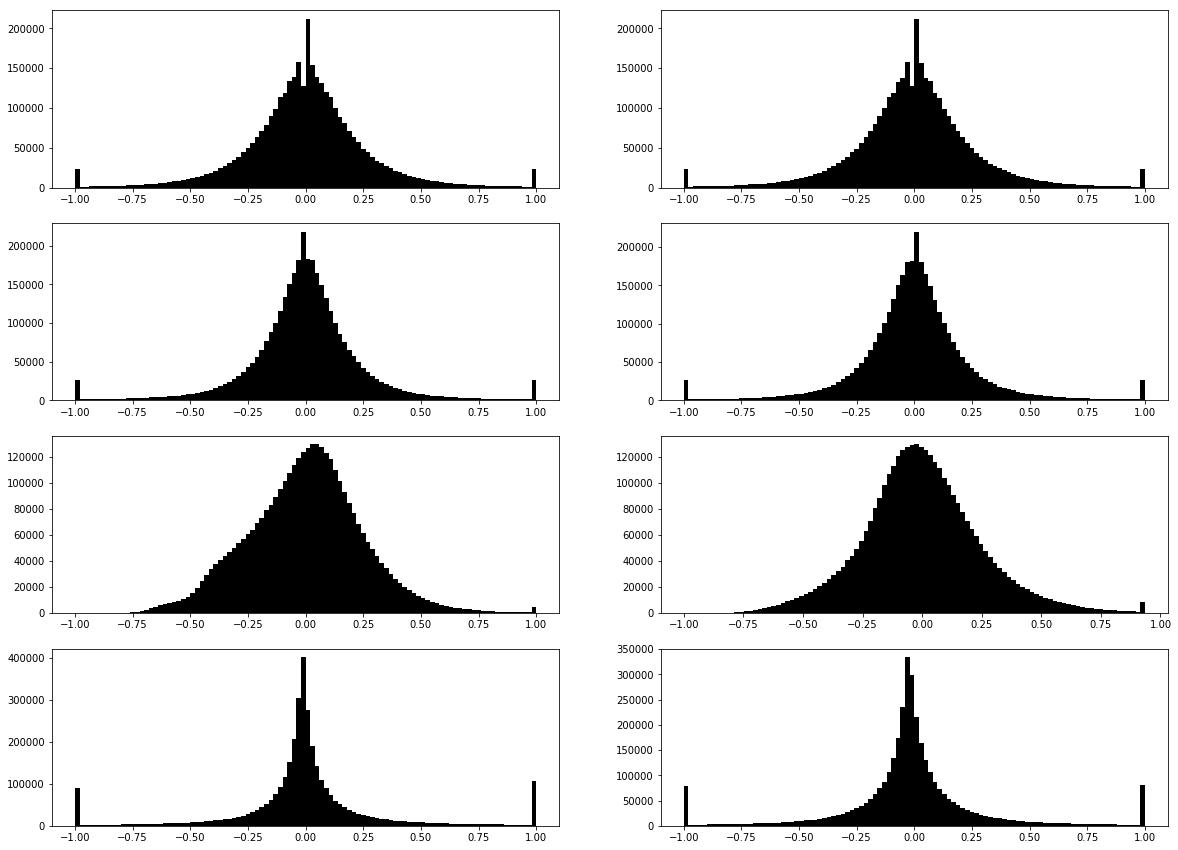

In [94]:
plt.subplots(figsize=(20, 15))
for i in range(8):
  plt.subplot(4,2,i+1)
  if (i==4 or i==5):
    sample=(np.log10(s1_nor[:,:,:,i])-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>4,4,sample)
    sample=np.where(sample<-4,-4,sample)/4
  elif (i==6 or i==7):
    sample=(s1_nor[:,:,:,i]-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>0.1,0.1,sample)
    sample=np.where(sample<-0.1,-0.1,sample)*10
  else:
    sample=(s1_nor[:,:,:,i]-s1_mean[i])/s1_stdd[i]
    sample=np.where(sample>3,3,sample)
    sample=np.where(sample<-3,-3,sample)/3
  plt.hist(sample.reshape([-1]), bins=100, color='k')
plt.show()

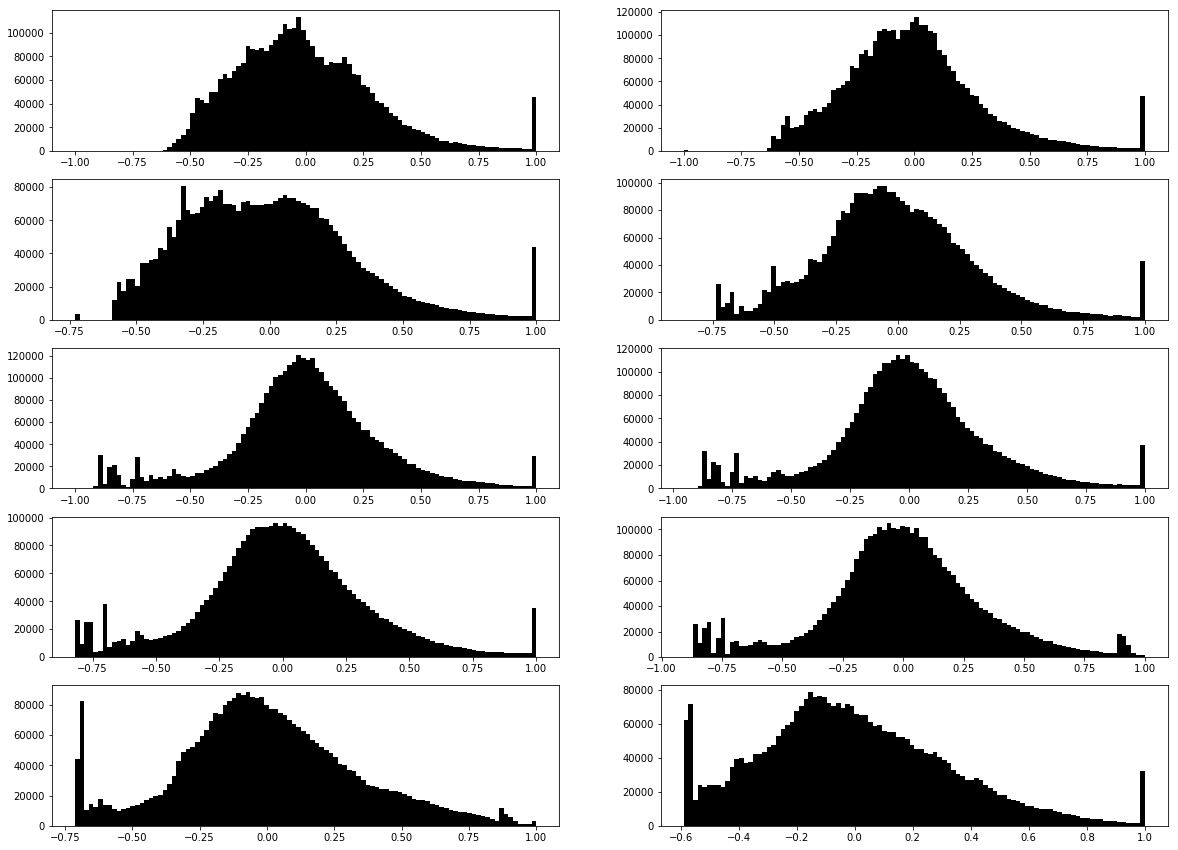

In [95]:
plt.subplots(figsize=(20, 15))
for i in range(10):
  plt.subplot(5,2,i+1)
  sample=(s2_nor[:,:,:,i]-s2_mean[i])/s2_stdd[i]
  sample=np.where(sample>3,3,sample)
  sample=np.where(sample<-3,-3,sample)/3
  plt.hist(sample.reshape([-1]), bins=100, color='k')
plt.show()

-0.004570336321095885 0.24234649288268956
-0.00037457262451145675 0.23533457229101162
-0.0025645836288824943 0.1420934870558165
-0.0074915047473500945 0.1346137366501408
-1.8349162685814835 0.23735558482782532
-2.2070361975342583 0.22408340347093808
-0.0011767934820455658 0.0009488781519921136
-0.002481871284506218 0.0012263042519125825


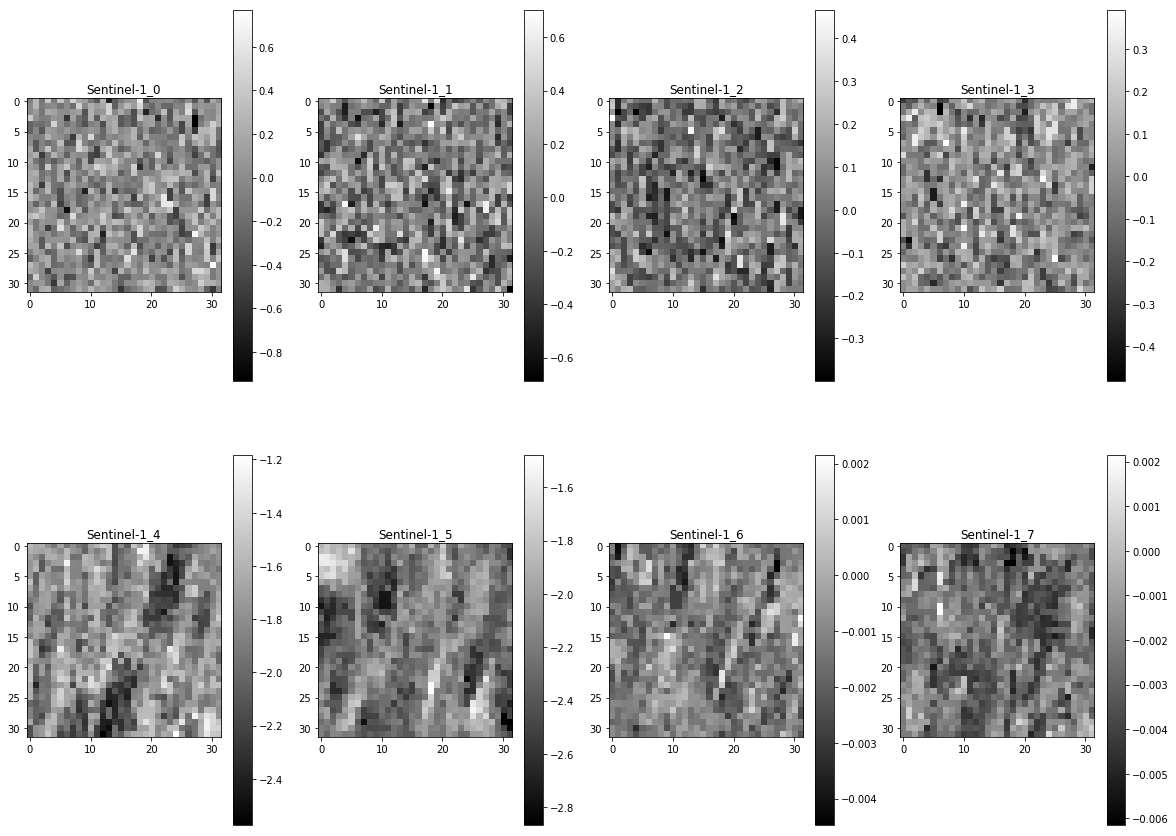

In [48]:
plt.subplots(figsize=(20, 15))

for i in range(8):
  plt.subplot(2,4,i+1)
  if (i>=4 and i<6):
    sample=(np.log10(s1_validation[0,:,:,i])-s1_mean[i])/s1_stdd[i]
    print(np.mean(sample),np.std(sample))
  else:
    sample=(s1_validation[0,:,:,i]-s1_mean[i])/s1_stdd[i]
    print(np.mean(sample),np.std(sample))
  plt.imshow(sample,cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-1_%d'%(i))
plt.show()

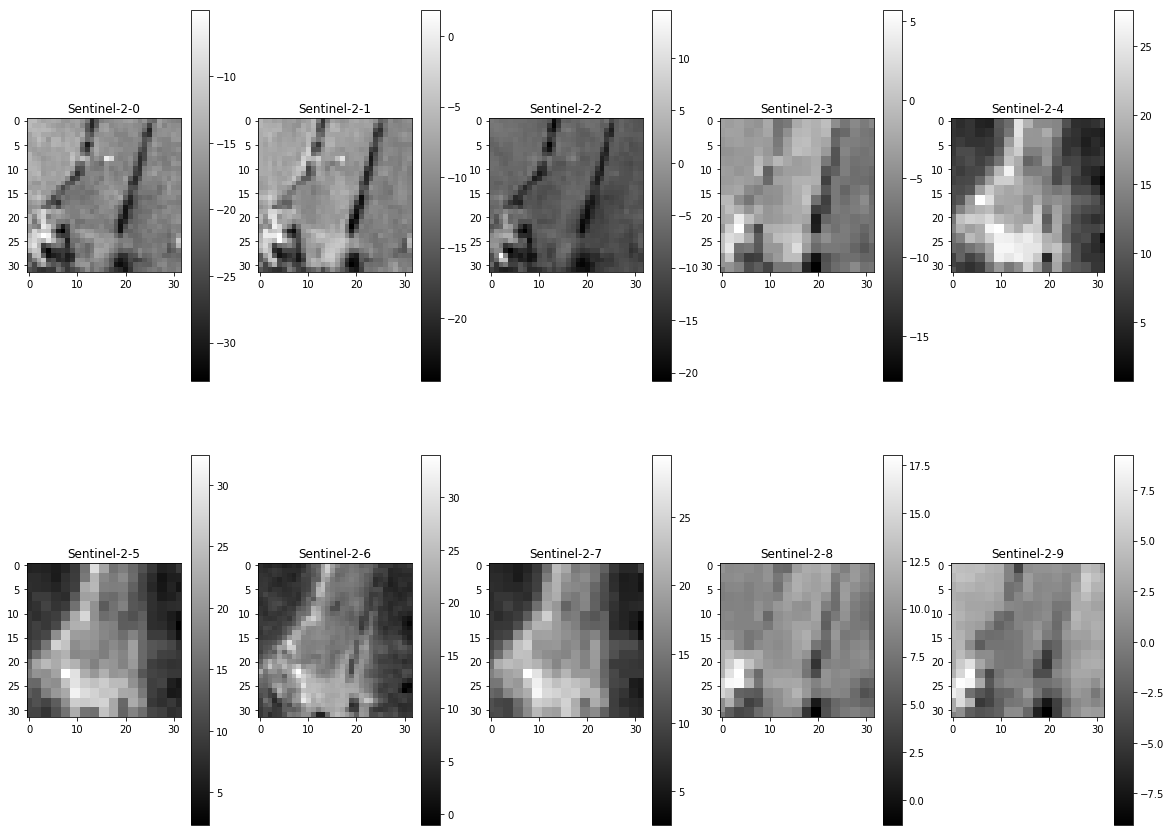

In [38]:
plt.subplots(figsize=(20, 15))

for i in range(10):
  plt.subplot(2,5,i+1)
  sample=(s2_training[9,:,:,i]-s2_mean[i])/s2_stdd[i]
  plt.imshow(sample,cmap=plt.cm.get_cmap('gray'));
  plt.colorbar()
  plt.title('Sentinel-2-%d'%(i))
plt.show()

In [ ]:
###############################################################################

In [ ]:
############################################################################

In [ ]:
##########################################################################

In [4]:
s1_ori=np.array(s1_validation).reshape([-1,8])

In [9]:
s1_0=np.where(s1_ori>0., 0., 1.)
(np.sum(s1_0,0)/float(len(s1_0)))

array([0.51297813, 0.51268458, 0.50604563, 0.50625091, 0.        ,
       0.        , 0.49174434, 0.48766071])

In [11]:
s1_0=[]
s1_ori=[]

In [12]:
s1_validation

<HDF5 dataset "sen1": shape (24119, 32, 32, 8), type "<f8">

In [13]:
s1_4=s1_validation[:,:,:,4].reshape([-1])
s1_5=s1_validation[:,:,:,5].reshape([-1])

In [54]:
s1_4a=np.where(s1_4>0.05, 0., 1.)
(np.sum(s1_4a,0)/float(len(s1_4a)))

0.7853795487349186

In [25]:
s1_5a=np.where(s1_5>0.1, 0., 1.)
(np.sum(s1_5a,0)/float(len(s1_5a)))

0.5124001451785937

In [61]:
s2_ori=s2_validation[:,:,:,:].reshape([-1,10])
np.sum(np.where(s2_ori>0.2, 0., 1.),0)/(24119*32*32)

array([0.96461976, 0.96774635, 0.94346999, 0.93856333, 0.76578781,
       0.59286199, 0.62990415, 0.47809931, 0.63551197, 0.82875068])